# <span style="color:dodgerblue">ENGLISH WOMEN'S FOOTBALL</span>
<span style="color:skyblue">**2024 Tidytuesday  Week 29** </span>

# Setup

## Libraries

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import matplotlib.patches as mpatches # for the legend
from pywaffle import Waffle

## Data

In [4]:
data_url='https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-07-16/ewf_matches.csv'
dfr = pd.read_csv(data_url)
dfr.shape

(2298, 22)

# EDA

## Overview

In [5]:
dfr.columns

Index(['season_id', 'season', 'tier', 'division', 'match_id', 'match_name',
       'date', 'attendance', 'home_team_id', 'home_team_name', 'away_team_id',
       'away_team_name', 'score', 'home_team_score', 'away_team_score',
       'home_team_score_margin', 'away_team_score_margin', 'home_team_win',
       'away_team_win', 'draw', 'result', 'note'],
      dtype='object')

In [7]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2298 entries, 0 to 2297
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   season_id               2298 non-null   object 
 1   season                  2298 non-null   object 
 2   tier                    2298 non-null   int64  
 3   division                2298 non-null   object 
 4   match_id                2298 non-null   object 
 5   match_name              2298 non-null   object 
 6   date                    2298 non-null   object 
 7   attendance              1110 non-null   float64
 8   home_team_id            2298 non-null   object 
 9   home_team_name          2298 non-null   object 
 10  away_team_id            2298 non-null   object 
 11  away_team_name          2298 non-null   object 
 12  score                   2298 non-null   object 
 13  home_team_score         2298 non-null   int64  
 14  away_team_score         2298 non-null   

In [8]:
dfr.head(3)

,season_id,season,tier,division,match_id,match_name,date,attendance,home_team_id,home_team_name,...,score,home_team_score,away_team_score,home_team_score_margin,away_team_score_margin,home_team_win,away_team_win,draw,result,note
0,S-2011-2011-1-S,2011-2011,1,FA Women's Super League (WSL),M-2011-2011-1-001-M,Chelsea Ladies vs Arsenal Ladies,2011-04-13,2510.0,T-008-T,Chelsea Ladies,...,0 -- 1,0,1,-1,1,0,1,0,Away team win,NaN
1,S-2011-2011-1-S,2011-2011,1,FA Women's Super League (WSL),M-2011-2011-1-002-M,Lincoln Ladies vs Doncaster Rovers Belles,2011-04-13,742.0,T-016-T,Lincoln Ladies,...,0 -- 1,0,1,-1,1,0,1,0,Away team win,NaN
2,S-2011-2011-1-S,2011-2011,1,FA Women's Super League (WSL),M-2011-2011-1-003-M,Birmingham City Ladies vs Bristol Academy,2011-04-14,602.0,T-003-T,Birmingham City Ladies,...,4 -- 0,4,0,4,-4,1,0,0,Home team win,NaN


## Total matches by season and division

In [15]:
dfr.loc[:, ['season', 'division']].head(3)

,season,division
0,2011-2011,FA Women's Super League (WSL)
1,2011-2011,FA Women's Super League (WSL)
2,2011-2011,FA Women's Super League (WSL)


In [108]:
dfr.value_counts(['season', 'division'])
dsd = dfr.groupby('season')['division'].value_counts().reset_index()
dsd['matches5'] = round(dsd.loc[:, 'count'] / 50, 0)
dsd.head(2)


,season,division,count,matches5
0,2011-2011,FA Women's Super League (WSL),56,1.0
1,2012-2012,FA Women's Super League (WSL),56,1.0


## Pivoting to large format

In [136]:
df_wide = dsd.pivot_table(index='division', columns='season', values='matches5', fill_value=0)
df_wide.columns = ['S2011', 'S2012', 'S2013', 'S2014', 'S2015',
                   'S2016', 'S2017', 'S2018', 'S2019', 'S2020',
                    'S2021','S2022','S2023','S2024']
df_wide.head(2)

,S2011,S2012,S2013,S2014,S2015,S2016,S2017,S2018,S2019,S2020,S2021,S2022,S2023,S2024
division,,,,,,,,,,,,,,
FA Women's Championship,0,0,0,0,0,0,0,0,2,1,2,3,0,0
FA Women's Super League (WSL),1,1,1,0,0,0,0,0,2,2,3,3,0,0


# Viz

## Waffle plot basics

[Source: Python-Graph-Gallery](https://python-graph-gallery.com/558-waffle-bar-chart/)

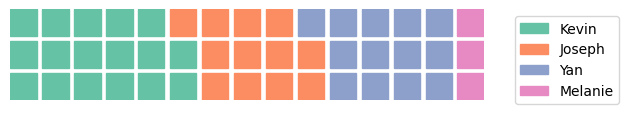

In [121]:
dat = {'Kevin': 10, 'Joseph': 7, 'Yan': 8, 'Melanie': 2}

plt.figure(
    FigureClass=Waffle,
    rows=3,
    columns=15,
    values=dat,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1)},
)

# Add a title
fig.suptitle('Basic Waffle Plot', fontsize=14, fontweight='bold', y = 1.05)

plt.show()

In [38]:
tdf = pd.DataFrame(data = {2022: [30, 28, 14],
                           2023: [45, 35, 16],
                           2024: [89, 38, 18]},
                  index=['car', 'truck', 'motorcycle'])
tdf

,2022,2023,2024
car,30,45,89
truck,28,35,38
motorcycle,14,16,18


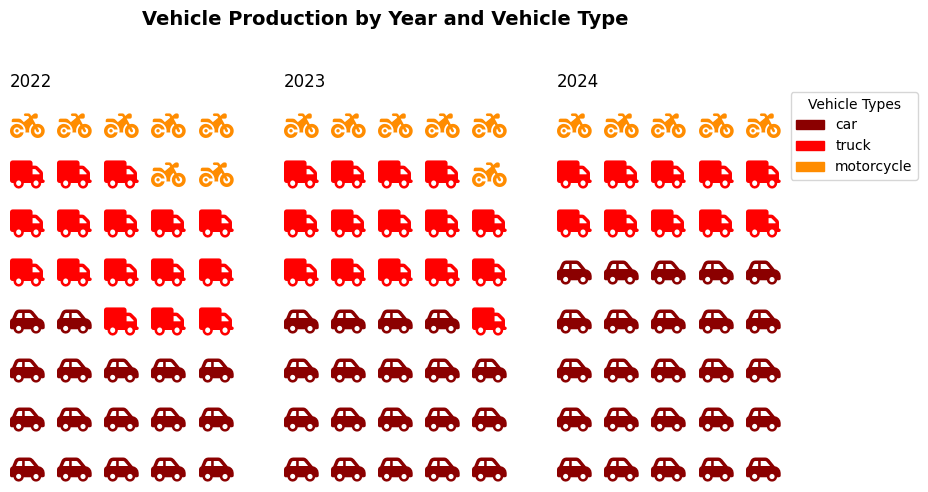

In [72]:
number_of_bars = len(tdf.columns) # one bar per year
colors = ["darkred", "red", "darkorange"]

# Init the whole figure and axes
fig, axs = plt.subplots(figsize=(10,5), nrows=1, ncols=number_of_bars,)

# Iterate over each bar and create it
for i,ax in enumerate(axs):
    
    col_name = tdf.columns[i]
    values = tdf[col_name] # values from the i-th column
    
    Waffle.make_waffle(
        ax=ax,  # pass axis to make_waffle 
        rows=8,
        columns=5,
        values=values,
        title={"label": col_name, "loc": "left"},
        colors=colors,
        vertical=True,
        icons=['car-side', 'truck', 'motorcycle'],
        font_size=20, # size of each point
        icon_legend=True,
        legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    )
# Add a title
fig.suptitle('Vehicle Production by Year and Vehicle Type', fontsize=14, fontweight='bold', y = 1.05)

# Add a legend
legend_labels = tdf.index
legend_elements = [
    mpatches.Patch(color=colors[i], label=legend_labels[i]) for i in range(len(colors))
    ]
fig.legend(handles=legend_elements, loc="upper right", title="Vehicle Types", bbox_to_anchor=(1.04, 0.9))

plt.show()

## Waffle plot Season  by Division

In [110]:
df_wide.columns
df_wide.index
df_wide.head(2)

,S2011,S2012,S2013,S2014,S2015,S2016,S2017,S2018,S2019,S2020,S2021,S2022,S2023,S2025
division,,,,,,,,,,,,,,
FA Women's Championship,0,0,0,0,0,0,0,0,2,1,2,3,0,0
FA Women's Super League (WSL),1,1,1,0,0,0,0,0,2,2,3,3,0,0


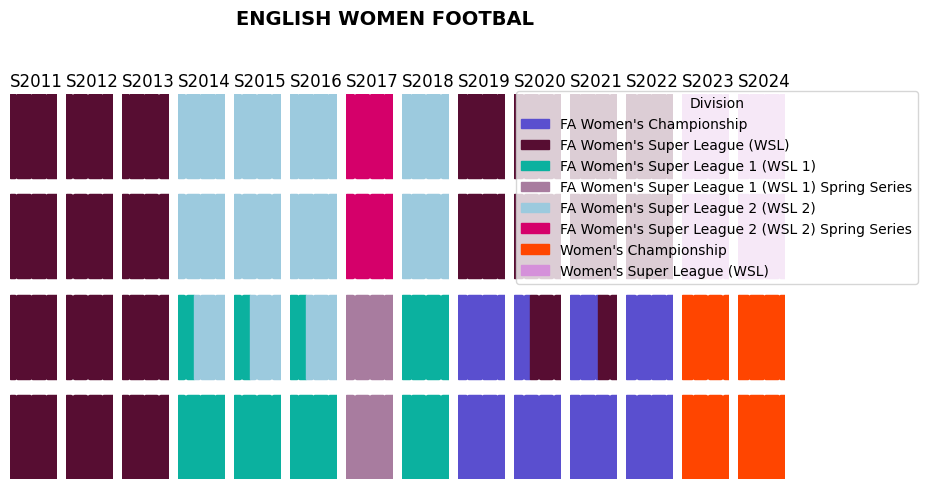

In [191]:
number_of_bars = len(df_wide.columns) # one bar per year
colors = ["#5A4FCF", "#570D32", "#0BB19F", "#a87c9f", "#9CCADE", "#D5006A", "#FF4500", "#D590DA"]

# Init the whole figure and axes
fig, axs = plt.subplots(figsize=(10,5), nrows=1, ncols=number_of_bars,)

# Iterate over each bar and create it
for i,ax in enumerate(axs):
    
    col_name = df_wide.columns[i]
    values = df_wide[col_name] # values from the i-th column
    
    Waffle.make_waffle(
        ax=ax,  # pass axis to make_waffle 
        rows=4,
        columns=50,
        values=values,
        title={"label": col_name, "loc": "left"},
        colors=colors,
        vertical=True,
        #icons=['car-side', 'truck', 'motorcycle'],
        font_size=.1, # size of each point
        icon_legend=True,
        legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
        
       
        
    )
# Add a title
fig.suptitle('ENGLISH WOMEN FOOTBAL', fontsize=14, fontweight='bold', y = 1.05)

# Add a legend
legend_labels = df_wide.index
legend_elements = [
    mpatches.Patch(color=colors[i], label=legend_labels[i]) for i in range(len(colors))
    ]
fig.legend(handles=legend_elements, 
           loc="upper right", 
           title="Division", 
           bbox_to_anchor=(1.04, 0.9))

plt.show()

In [139]:
df_wide.loc[:, 'S2024']

division
FA Women's Championship                            0
FA Women's Super League (WSL)                      0
FA Women's Super League 1 (WSL 1)                  0
FA Women's Super League 1 (WSL 1) Spring Series    0
FA Women's Super League 2 (WSL 2)                  0
FA Women's Super League 2 (WSL 2) Spring Series    0
Women's Championship                               3
Women's Super League (WSL)                         3
Name: S2024, dtype: int64

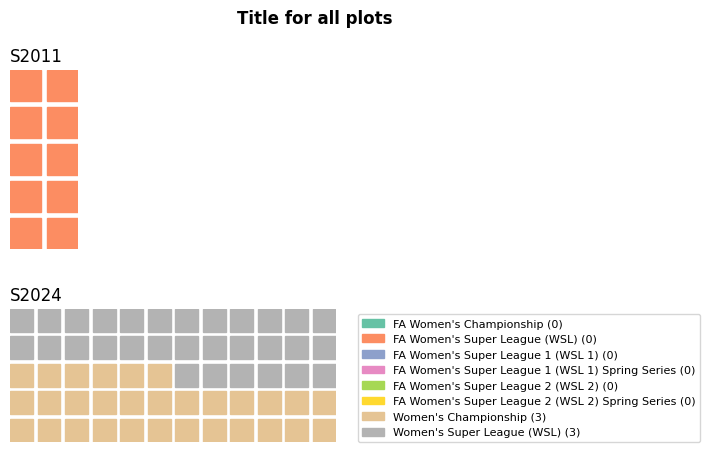

In [190]:
dfv = pd.DataFrame({
        'labels': ['G1', 'G2', 'G3', 'G4'],
        'A': [10, 15, 25, 30],
        'B': [5, 40, 12, 16]}).set_index('labels')

# Waffle subfigure
fig = plt.figure(
    FigureClass = Waffle,
    vertical=True,
    plots = {
        211: {
            'values': df_wide['S2011'] * 10, 
            'title': {'label': df_wide['S2011'].name, 'loc': 'left', 'fontsize': 12}
        },
        212: {
            'values': df_wide['S2024'] * 10, 
            'labels': [f"{k} ({v})" for k, v in df_wide['S2024'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': df_wide['S2024'].name, 'loc': 'left', 'fontsize': 12}
        }
    },
    rows = 5,
    )

fig.suptitle('Title for all plots', fontsize = 12, fontweight = 'bold')
plt.show()

In [171]:
df_wide['S2024'].name

'S2024'

In [209]:
dfw2 = df_wide.reset_index()

In [210]:
plot_labels = [f'{i} {j}' for i,j in zip(dfw2.division, dfw2.S2024)]
plot_labels

["FA Women's Championship 0",
 "FA Women's Super League (WSL) 0",
 "FA Women's Super League 1 (WSL 1) 0",
 "FA Women's Super League 1 (WSL 1) Spring Series 0",
 "FA Women's Super League 2 (WSL 2) 0",
 "FA Women's Super League 2 (WSL 2) Spring Series 0",
 "Women's Championship 3",
 "Women's Super League (WSL) 3"]

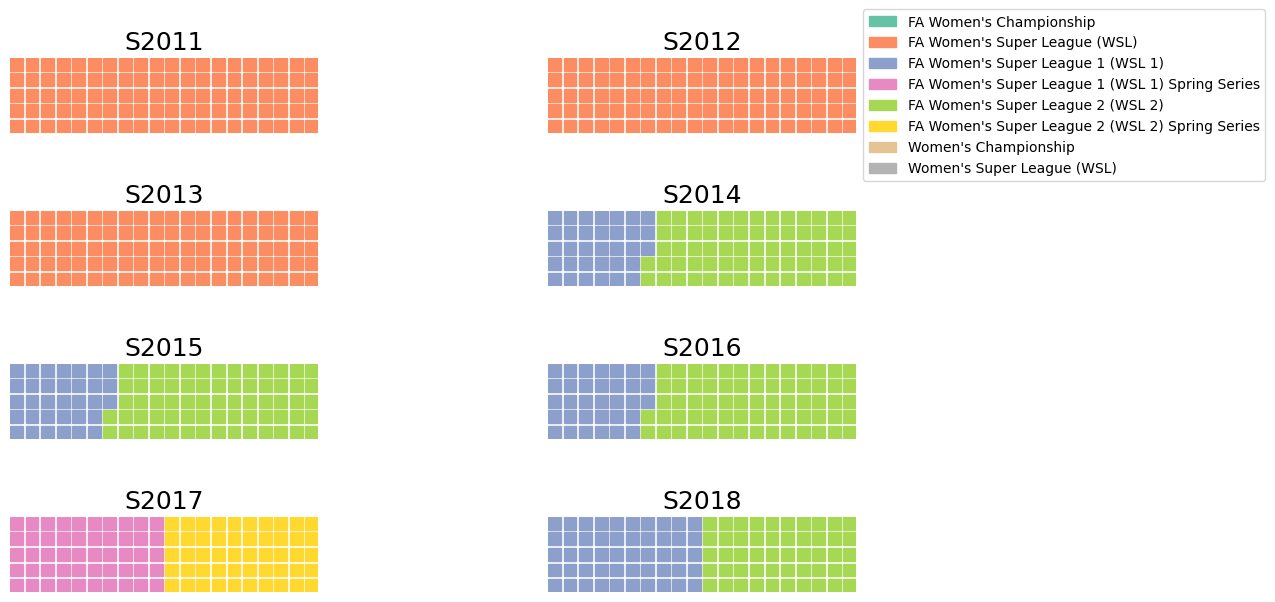

In [276]:
plt.figure(
    plots ={
        421: {
            'values':  list(dfw2['S2011']),
            'title':{'label':'S2011', 'fontsize': 18}},
        422: {
            'values':  list(dfw2['S2012']),
            'labels': [f'{i}' for i in dfw2.division],
            'legend': {'loc':'center left', 'bbox_to_anchor':(1, .5), 'ncol':1, 'fontsize':10},
            'title':{'label':'S2012', 'fontsize': 18}},
        423: {
            'values':  list(dfw2['S2013']),
            'title':{'label':'S2013', 'fontsize': 18}
            },
        424: {
            'values':  list(dfw2['S2014']),
            'title':{'label':'S2014', 'fontsize': 18}
            },
        425: {
            'values':  list(dfw2['S2015']),
            'title':{'label':'S2015', 'fontsize': 18}
            },
        426: {
            'values':  list(dfw2['S2016']),
            'title':{'label':'S2016', 'fontsize': 18}
            },
        427: {
            'values':  list(dfw2['S2017']),
            'title':{'label':'S2017', 'fontsize': 18}
            },
        428: {
            'values':  list(dfw2['S2018']),
            'title':{'label':'S2018', 'fontsize': 18}
            },
        },
    figsize=(15, 6),
    FigureClass = Waffle,
    rows = 5,
    columns = 20,
    starting_location='NW'
)
plt.show()


In [271]:
dfw2

,division,S2011,S2012,S2013,S2014,S2015,S2016,S2017,S2018,S2019,S2020,S2021,S2022,S2023,S2024
0,FA Women's Championship,0,0,0,0,0,0,0,0,2,1,2,3,0,0
1,FA Women's Super League (WSL),1,1,1,0,0,0,0,0,2,2,3,3,0,0
2,FA Women's Super League 1 (WSL 1),0,0,0,1,1,1,0,2,0,0,0,0,0,0
3,FA Women's Super League 1 (WSL 1) Spring Series,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,FA Women's Super League 2 (WSL 2),0,0,0,2,2,2,0,2,0,0,0,0,0,0
5,FA Women's Super League 2 (WSL 2) Spring Series,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,Women's Championship,0,0,0,0,0,0,0,0,0,0,0,0,3,3
7,Women's Super League (WSL),0,0,0,0,0,0,0,0,0,0,0,0,3,3
